# **Decision Tree Classifier**

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data_path = 'tweets.csv'
tweets_df = pd.read_csv(data_path, encoding='latin')

# Display the first few rows of the DataFrame
tweets_df.head()

,company,tweet,sentiment
0,$ICICIBANK.NSE,$ICICIBANK.NSE Trade in action & Very close to...,Bullish
1,$ICICIBANK.NSE,$ICICIBANK.NSE Stock is trading with bullish m...,Bullish
2,$ICICIBANK.NSE,"$ICICIBANK.NSE \nBased on the chart analysis,...",Bullish
3,$ICICIBANK.NSE,$ICICIBANK.NSE crossed the resistance line wit...,Bullish
4,$ICICIBANK.NSE,$ICICIBANK.NSE \nThe stock is moving with the...,Bullish


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Step 1: Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(tweets_df['tweet'])

# Step 2: Data Preprocessing
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(tweets_df['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = dt_classifier.predict(X_test)
train_accuracy = dt_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

train_accuracy, test_accuracy, conf_matrix, class_report


(1.0,
 0.9928400954653938,
 array([[ 516,    5],
        [   7, 1148]]),
 '              precision    recall  f1-score   support\n\n     Bearish       0.99      0.99      0.99       521\n     Bullish       1.00      0.99      0.99      1155\n\n    accuracy                           0.99      1676\n   macro avg       0.99      0.99      0.99      1676\nweighted avg       0.99      0.99      0.99      1676\n')

In [ ]:
print(class_report)

              precision    recall  f1-score   support

     Bearish       0.99      0.99      0.99       521
     Bullish       1.00      0.99      0.99      1155

    accuracy                           0.99      1676
   macro avg       0.99      0.99      0.99      1676
weighted avg       0.99      0.99      0.99      1676



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Step 5: Additional Metrics Calculation
# Compute Precision, Recall, F1-score and Accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

precision, recall, f1, accuracy


(0.9928508923720532,
 0.9928400954653938,
 0.9928438513998296,
 0.9928400954653938)

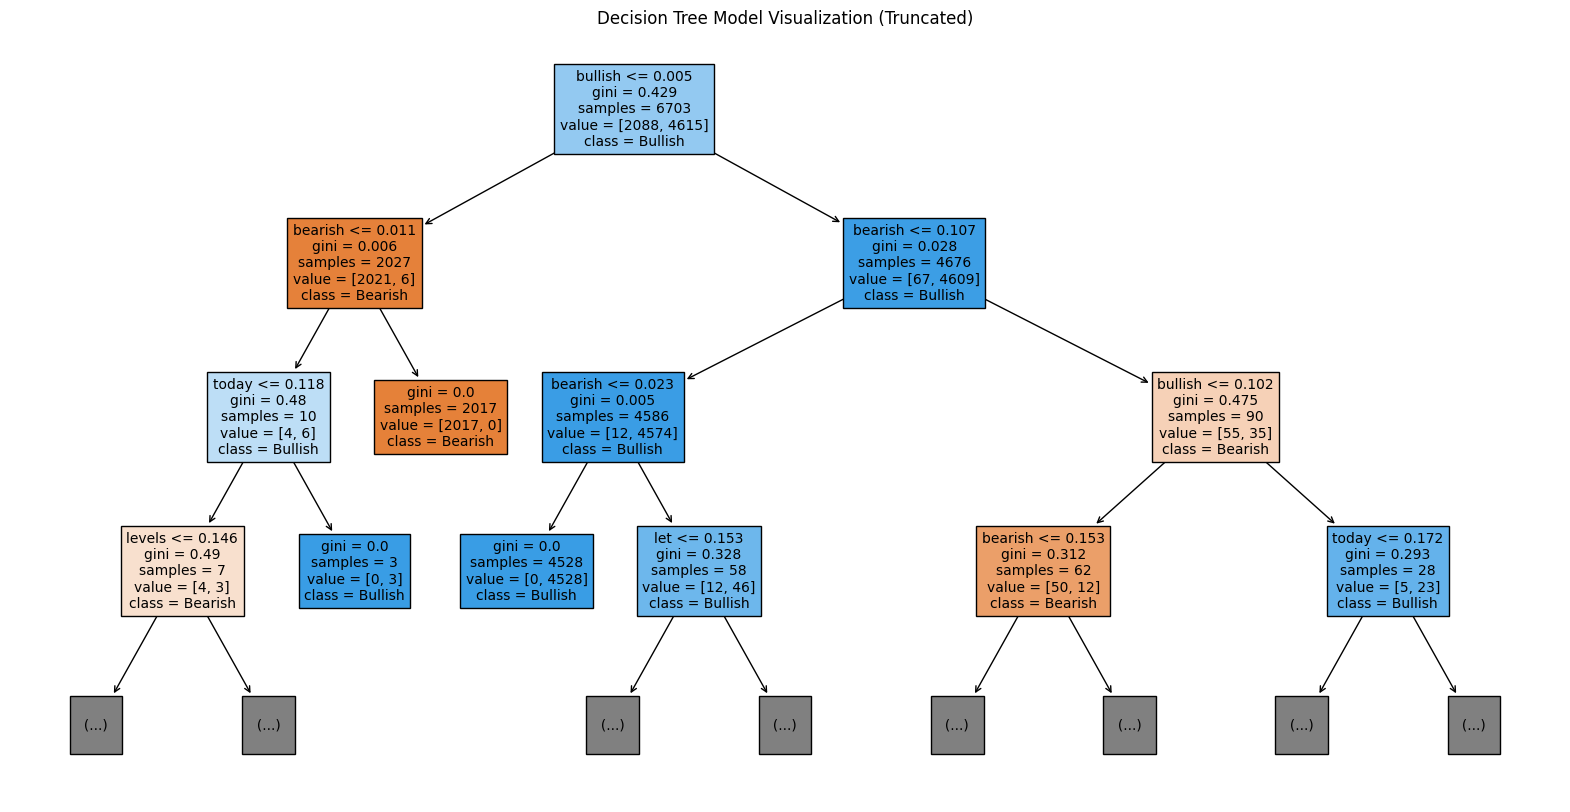

<Figure size 800x600 with 0 Axes>

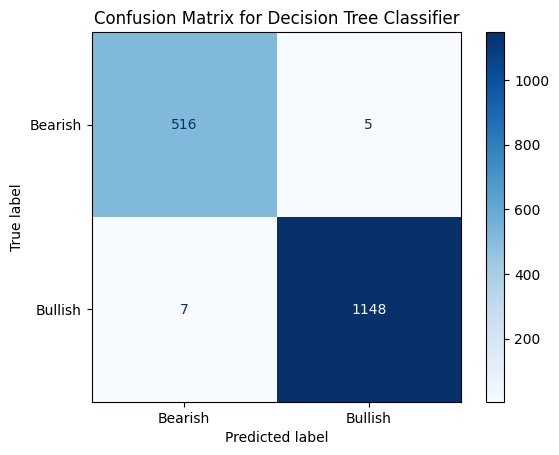

<Figure size 800x600 with 0 Axes>

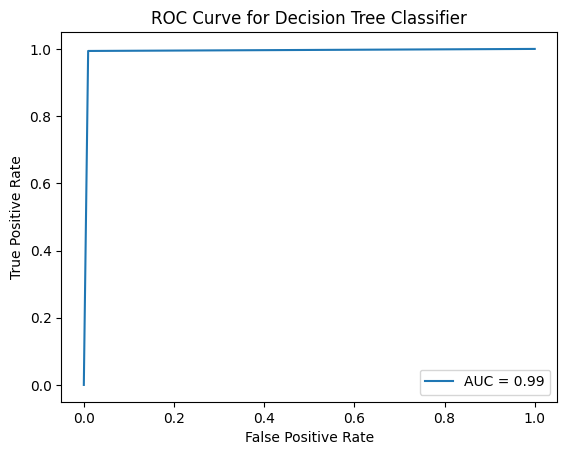

(1.0,
 0.9928400954653938,
 array([[ 516,    5],
        [   7, 1148]]),
 '              precision    recall  f1-score   support\n\n     Bearish       0.99      0.99      0.99       521\n     Bullish       1.00      0.99      0.99      1155\n\n    accuracy                           0.99      1676\n   macro avg       0.99      0.99      0.99      1676\nweighted avg       0.99      0.99      0.99      1676\n',
 0.9921712324783342)

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree model
plt.figure(figsize=(20, 10))
tree_plot = plot_tree(dt_classifier, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=le.classes_, max_depth=3, fontsize=10)
plt.title("Decision Tree Model Visualization (Truncated)")
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Calculate ROC AUC score and plot ROC curve
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('ROC Curve for Decision Tree Classifier')
plt.show()

# Outputs
train_accuracy, test_accuracy, conf_matrix, class_report, roc_auc


# **LSTM**

2024-05-03 17:18:11.968320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 17:18:11.968435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 17:18:12.100047: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7784 - loss: 0.4286 - val_accuracy: 0.9964 - val_loss: 0.0072
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9994 - loss: 0.0071 - val_accuracy: 0.9970 - val_loss: 0.0058
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9964 - val_loss: 0.0076
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9970 - val_loss: 0.0107
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9970 - val_loss: 0.0100
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 8.8225e-04 - val_accuracy: 0.9970 - val_loss: 0.0102
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9999 - loss: 8.8712e-04 - val_accuracy: 0.9976 - val_loss: 0.0110
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 5.9821e-0

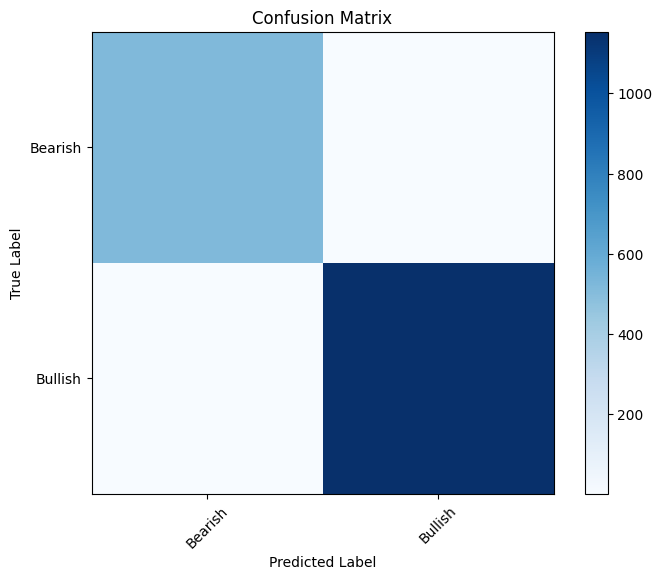

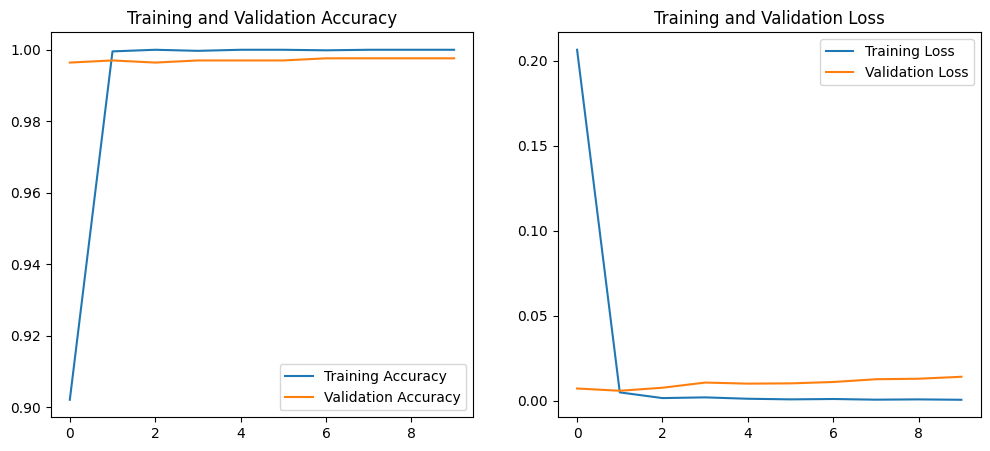

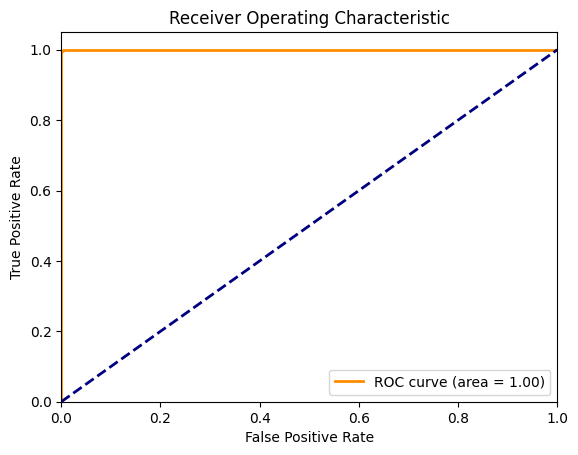

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Data Preprocessing
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets_df['tweet'])
X = tokenizer.texts_to_sequences(tweets_df['tweet'])
X = pad_sequences(X, maxlen=50)

# Encoding labels
le = LabelEncoder()
y = le.fit_transform(tweets_df['sentiment'])
y = to_categorical(y)  # One-hot encoding for categorical output

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluating the model
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_acc}")
print(f"Validation Accuracy: {val_acc}")

# Prediction and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.8f}")
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1 Score: {f1:.8f}")

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))




53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.99761337
Precision: 0.99761337
Recall: 0.99761337
F1 Score: 0.99761337
              precision    recall  f1-score   support

     Bearish       1.00      1.00      1.00       521
     Bullish       1.00      1.00      1.00      1155

    accuracy                           1.00      1676
   macro avg       1.00      1.00      1.00      1676
weighted avg       1.00      1.00      1.00      1676



# **RoBERTa**

In [ ]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_metric
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

# Disable wandb
os.environ["WANDB_DISABLED"] = "true"

# Load and preprocess data
data = pd.read_csv('tweets.csv')
data['tweet_cleaned'] = data['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
data['tweet_cleaned'] = data['tweet_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x, re.I | re.A))  # Remove non-alphabetical characters
data['tweet_cleaned'] = data['tweet_cleaned'].apply(lambda x: x.lower().strip())  # Convert to lowercase

# Encode labels
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['tweet_cleaned'], data['sentiment_encoded'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_data(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

train_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'labels': y_train}))
test_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'labels': y_test}))
train_dataset = train_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

# Model setup
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_))

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

# Metric setup
accuracy_metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_metric.compute(predictions=predictions, references=labels)['accuracy'],
        "precision": precision_score(labels, predictions, average='weighted'),
        "recall": recall_score(labels, predictions, average='weighted'),
        "f1": f1_score(labels, predictions, average='weighted')
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
evaluation_results = trainer.evaluate()

# Output evaluation metrics
print(f"Accuracy: {evaluation_results['eval_accuracy']}")
print(f"Precision: {evaluation_results['eval_precision']}")
print(f"Recall: {evaluation_results['eval_recall']}")
print(f"F1 Score: {evaluation_results['eval_f1']}")

# Plotting Training and Validation Loss, and Evaluation Accuracy
train_logs = trainer.state.log_history
train_loss = [log['loss'] for log in train_logs if 'loss' in log]
eval_loss = [log['eval_loss'] for log in train_logs if 'eval_loss' in log]
eval_accuracy = [log['eval_accuracy'] for log in train_logs if 'eval_accuracy' in log]
epochs = range(1, len(train_loss) + 1)




2024-05-03 17:22:54.753809: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 17:22:54.753912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 17:22:54.879569: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/6703 [00:00<?, ? examples/s]

Map:   0%|          | 0/1676 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipykernel_34/2465813657.py:59: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
/opt/conda/lib/python3.10/site-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.039900,0.034005,0.988067,0.988055,0.988067,0.988054
2,0.035100,0.044237,0.988067,0.988133,0.988067,0.988085
3,0.003300,0.072630,0.986277,0.986627,0.986277,0.986336


Accuracy: 0.9880668257756563
Precision: 0.9880546058840602
Recall: 0.9880668257756563
F1 Score: 0.9880541470401132


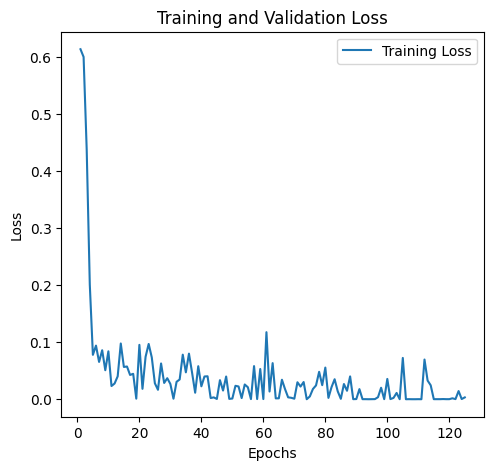

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
# plt.plot(epochs, eval_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



# **BERT**

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6703 [00:00<?, ? examples/s]

Map:   0%|          | 0/1676 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.014400,0.036142,0.985084,0.985278,0.985084,0.984997
2,0.004000,0.032986,0.988663,0.988696,0.988663,0.988630
3,0.001100,0.049395,0.988663,0.988670,0.988663,0.988666


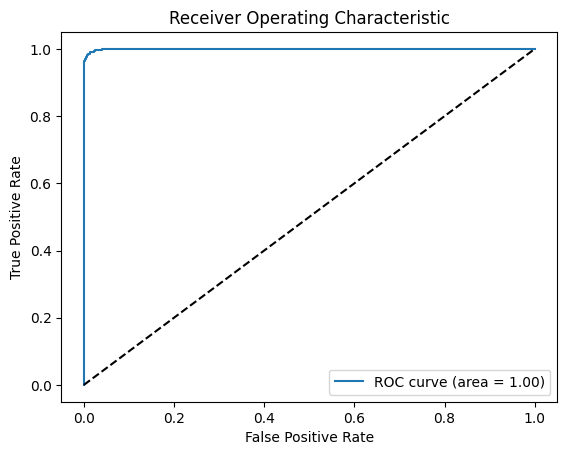

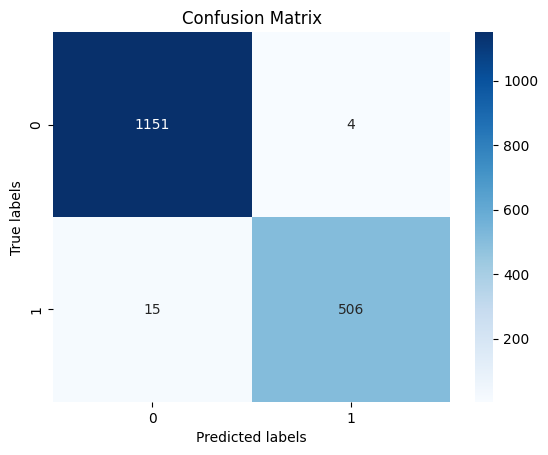

Accuracy: 0.98866348
Precision: 0.98869644
Recall: 0.98866348
F1 Score: 0.98862987


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_metric
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Load and preprocess data
data = pd.read_csv('tweets.csv')
data['tweet_cleaned'] = data['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
data['tweet_cleaned'] = data['tweet_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x, re.I | re.A))
data['tweet_cleaned'] = data['tweet_cleaned'].apply(lambda x: x.lower().strip())
data['sentiment_encoded'] = pd.factorize(data['sentiment'])[0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(data['tweet_cleaned'], data['sentiment_encoded'], test_size=0.2, random_state=42)

# Setup BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(np.unique(y_train)))

def tokenize_data(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

train_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'labels': y_train}))
test_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'labels': y_test}))
train_dataset = train_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluation and predictions
results = trainer.evaluate()
predictions = trainer.predict(test_dataset)
probs = np.exp(predictions.predictions) / np.exp(predictions.predictions).sum(-1, keepdims=True)
predicted_labels = np.argmax(probs, axis=1)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)  # Assuming binary classification for simplicity
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy, precision, recall, and F1 score
print(f"Accuracy: {results['eval_accuracy']:.8f}")
print(f"Precision: {results['eval_precision']:.8f}")
print(f"Recall: {results['eval_recall']:.8f}")
print(f"F1 Score: {results['eval_f1']:.8f}")
